In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("D:\TaiLieu\KhaiPhaDuLieu\BaiTapLon\TapDuLieu\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df['gender'])
df["smoking_history"] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [44]:
X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [47]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc = dtc.fit(X_train, Y_train)
dtc

DecisionTreeClassifier(criterion='entropy')

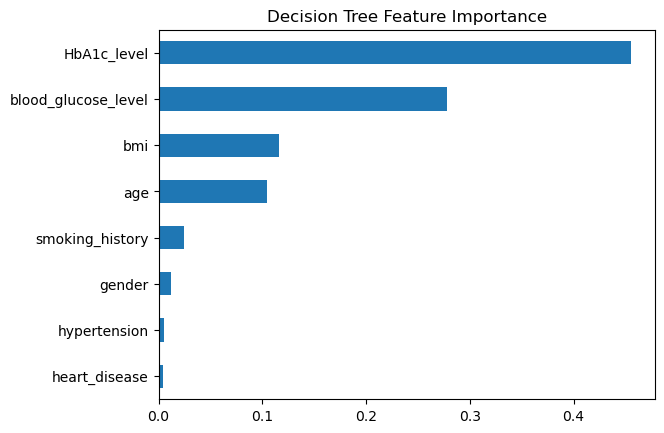

In [50]:
feature_importances = pd.Series(dtc.feature_importances_, dtc.feature_names_in_).sort_values()
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

In [48]:
y_pred = dtc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     26267
           1       0.71      0.75      0.73      2577

    accuracy                           0.95     28844
   macro avg       0.84      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844



In [12]:
from sklearn.metrics import confusion_matrix , precision_score, accuracy_score , recall_score
print("Accuracy: " , accuracy_score(Y_test, y_pred))
print("Precision: " , precision_score(Y_test ,y_pred))
print("Recall: " , recall_score(Y_test , y_pred) )
matrix = confusion_matrix(Y_test , y_pred)
print("Confusion matrix: ")
print(matrix)

Accuracy:  0.9499722645957565
Precision:  0.7078445747800587
Recall:  0.7493209157935584
Confusion matrix: 
[[25470   797]
 [  646  1931]]


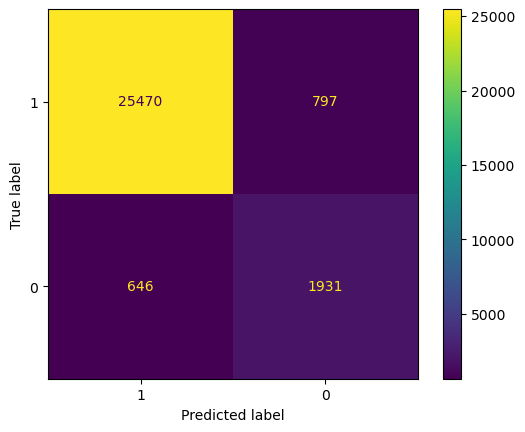

In [15]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["1", "0"])

cm_display.plot()
plt.show()

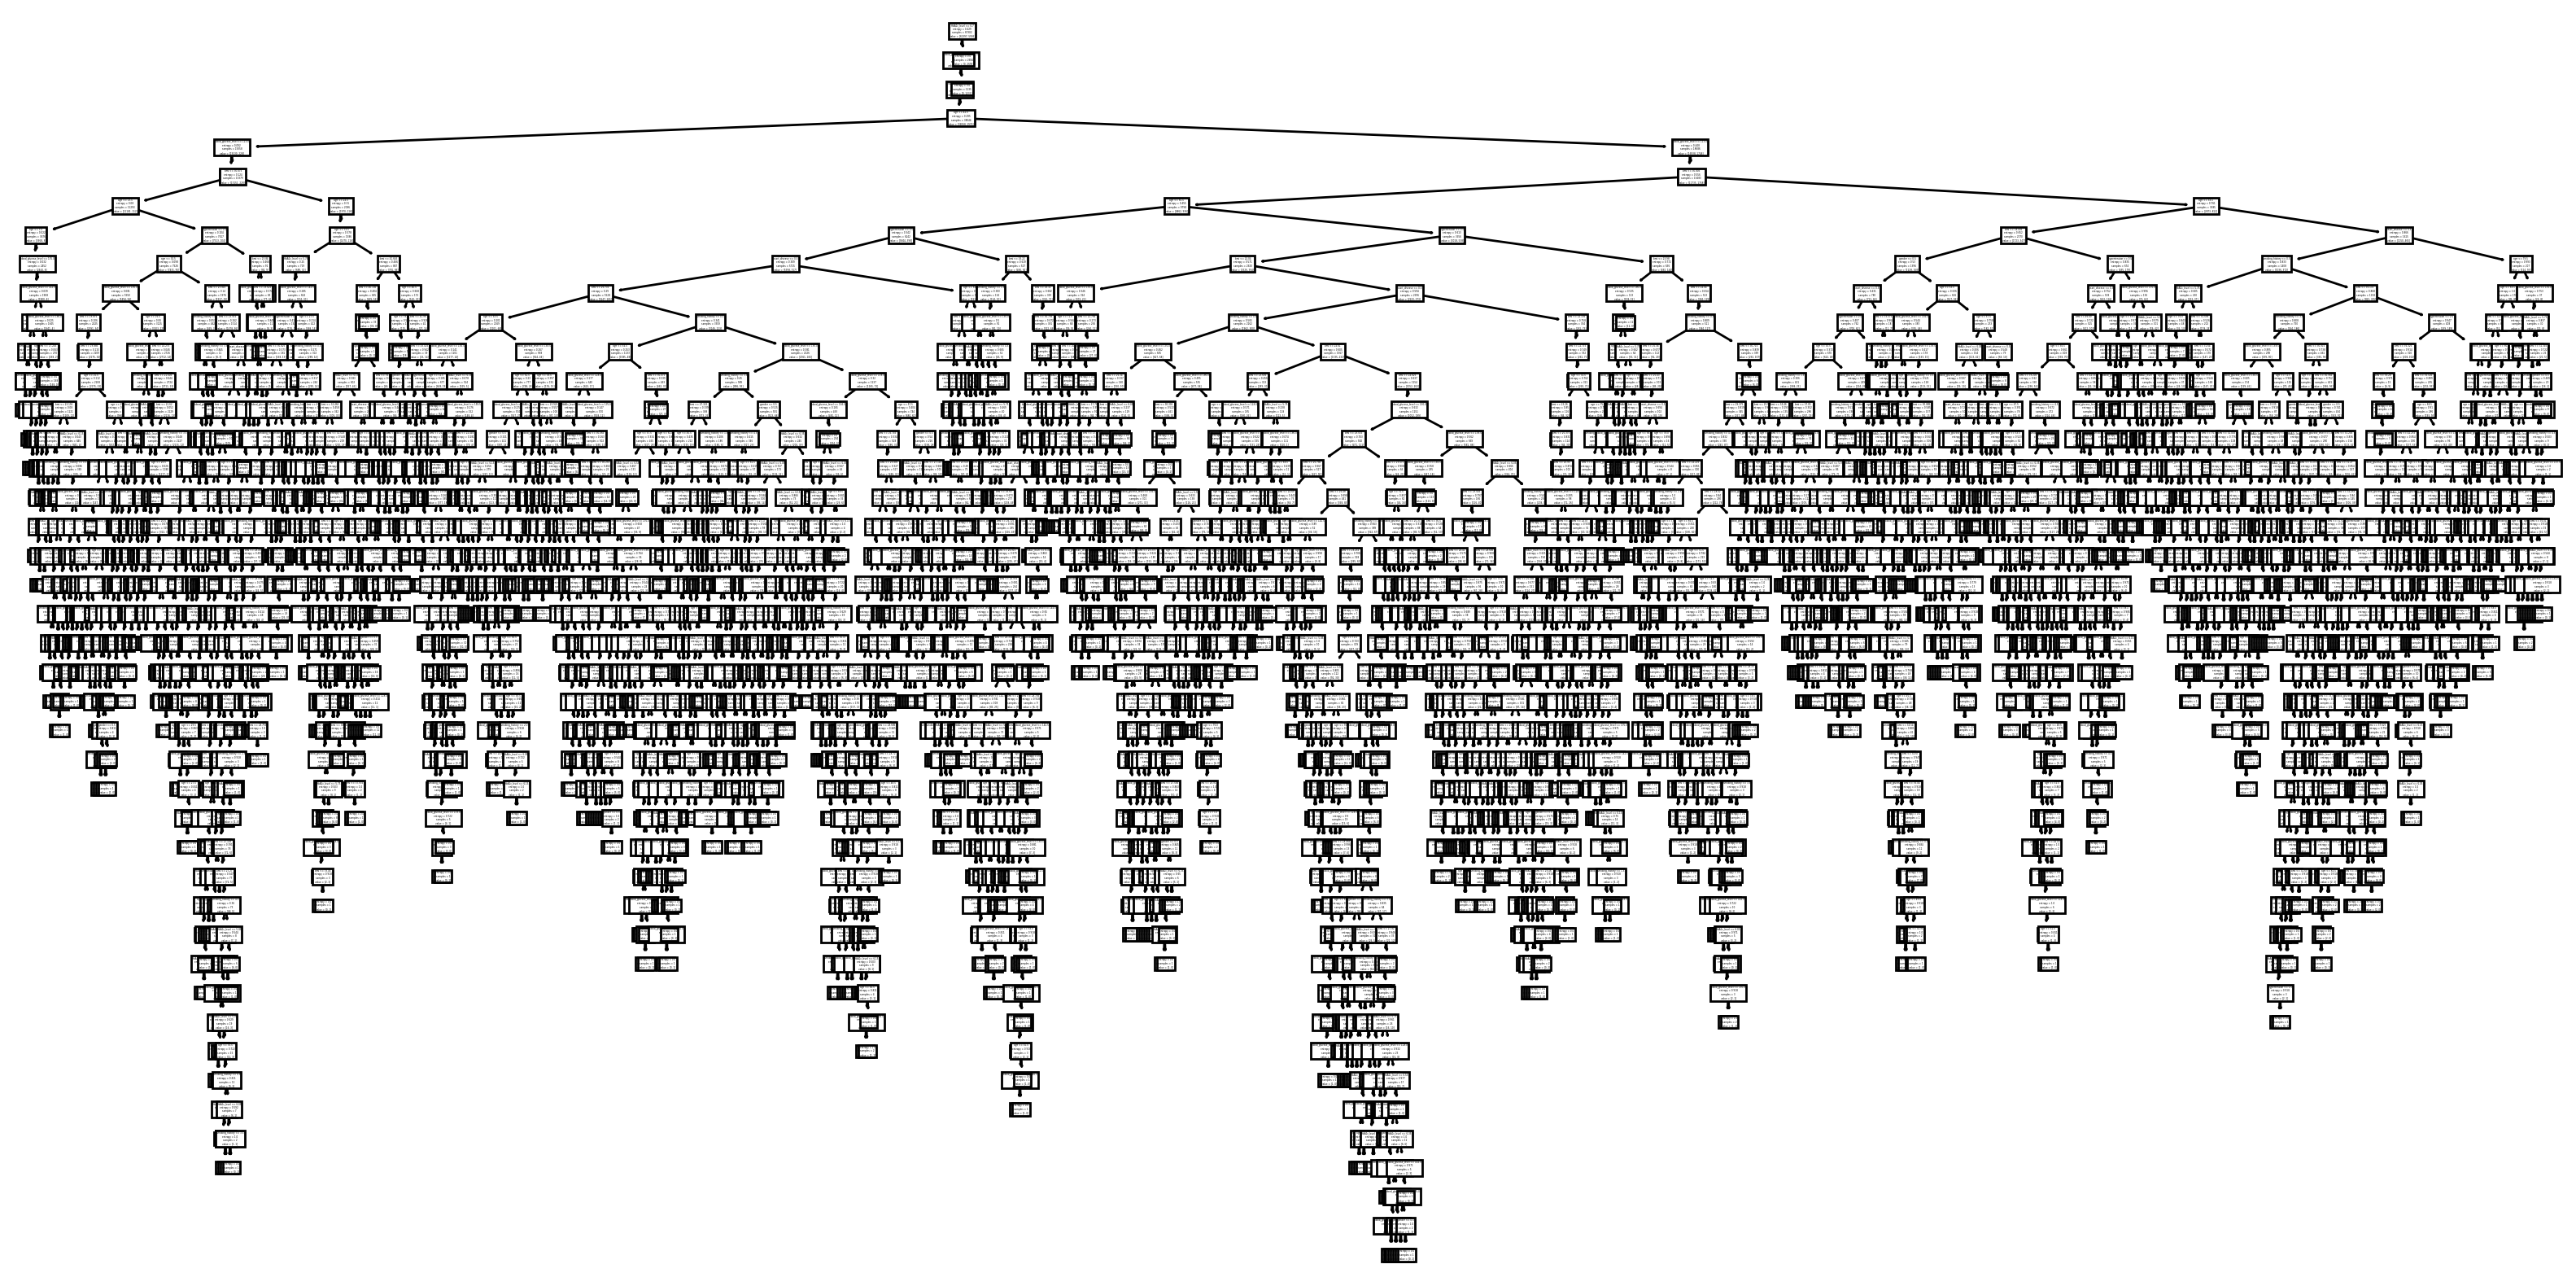

In [19]:
from sklearn import tree
plt.figure(figsize=(20, 10), dpi=200)
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',	'HbA1c_level', 'blood_glucose_level', 'diabetes']
tree.plot_tree(dtc, feature_names=features)
plt.show()

In [21]:
df1 = df.sample(n = 1000, random_state=42)
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2547,0,5.0,0,0,0,15.14,4.5,90,0
34774,1,19.0,0,0,4,22.74,6.6,85,0
71084,0,52.0,0,0,4,24.27,7.5,220,1
50584,1,55.0,0,0,0,27.32,5.7,85,0
80788,0,22.0,0,0,4,28.78,4.5,200,0
...,...,...,...,...,...,...,...,...,...
78225,1,54.0,0,1,5,27.32,6.5,155,0
24850,0,80.0,1,0,4,25.06,6.1,140,0
27468,0,14.0,0,0,5,27.32,3.5,159,0
54403,0,44.0,1,0,4,27.32,6.6,90,0


In [38]:
X1 = df1.iloc[:, 0:8]
Y1 = df1.iloc[:, 8]

In [39]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X1, Y1, test_size = 0.30, random_state = 42)

In [40]:
dtc_1 = DecisionTreeClassifier(criterion='entropy')
dtc_1 = dtc.fit(X_train_1, Y_train_1)
dtc_1

DecisionTreeClassifier(criterion='entropy')

In [41]:
from sklearn.metrics import confusion_matrix
y_pred_1 = dtc_1.predict(X_test_1)
print("Accuracy: " , accuracy_score(Y_test_1, y_pred_1))
print("Precision: " , precision_score(Y_test_1 ,y_pred_1))
print("Recall: " , recall_score(Y_test_1 , y_pred_1) )
matrix_1 = confusion_matrix(Y_test_1 , y_pred_1)
print("Confusion matrix: ")
print(matrix_1)

Accuracy:  0.9533333333333334
Precision:  0.7307692307692307
Recall:  0.7307692307692307
Confusion matrix: 
[[267   7]
 [  7  19]]


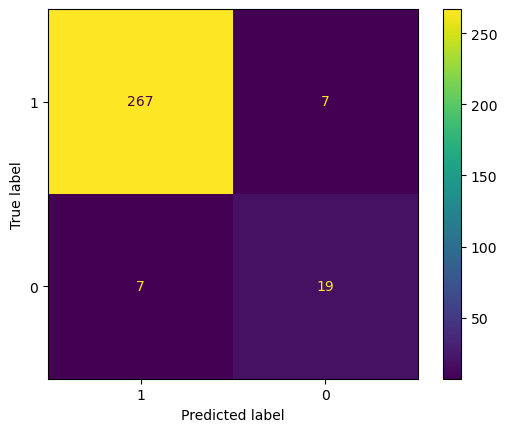

In [42]:
from sklearn import metrics

confusion_matrix_1 = metrics.confusion_matrix(Y_test_1, y_pred_1)

cm_display_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix_1, display_labels = ["1", "0"])

cm_display_1.plot()
plt.show()

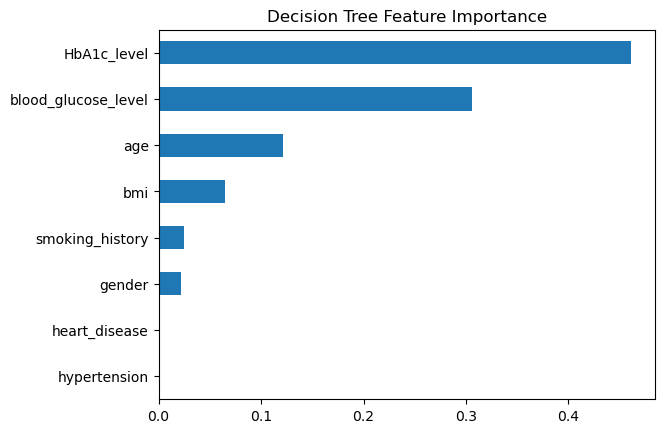

In [51]:
feature_importances = pd.Series(dtc_1.feature_importances_, dtc_1.feature_names_in_).sort_values()
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

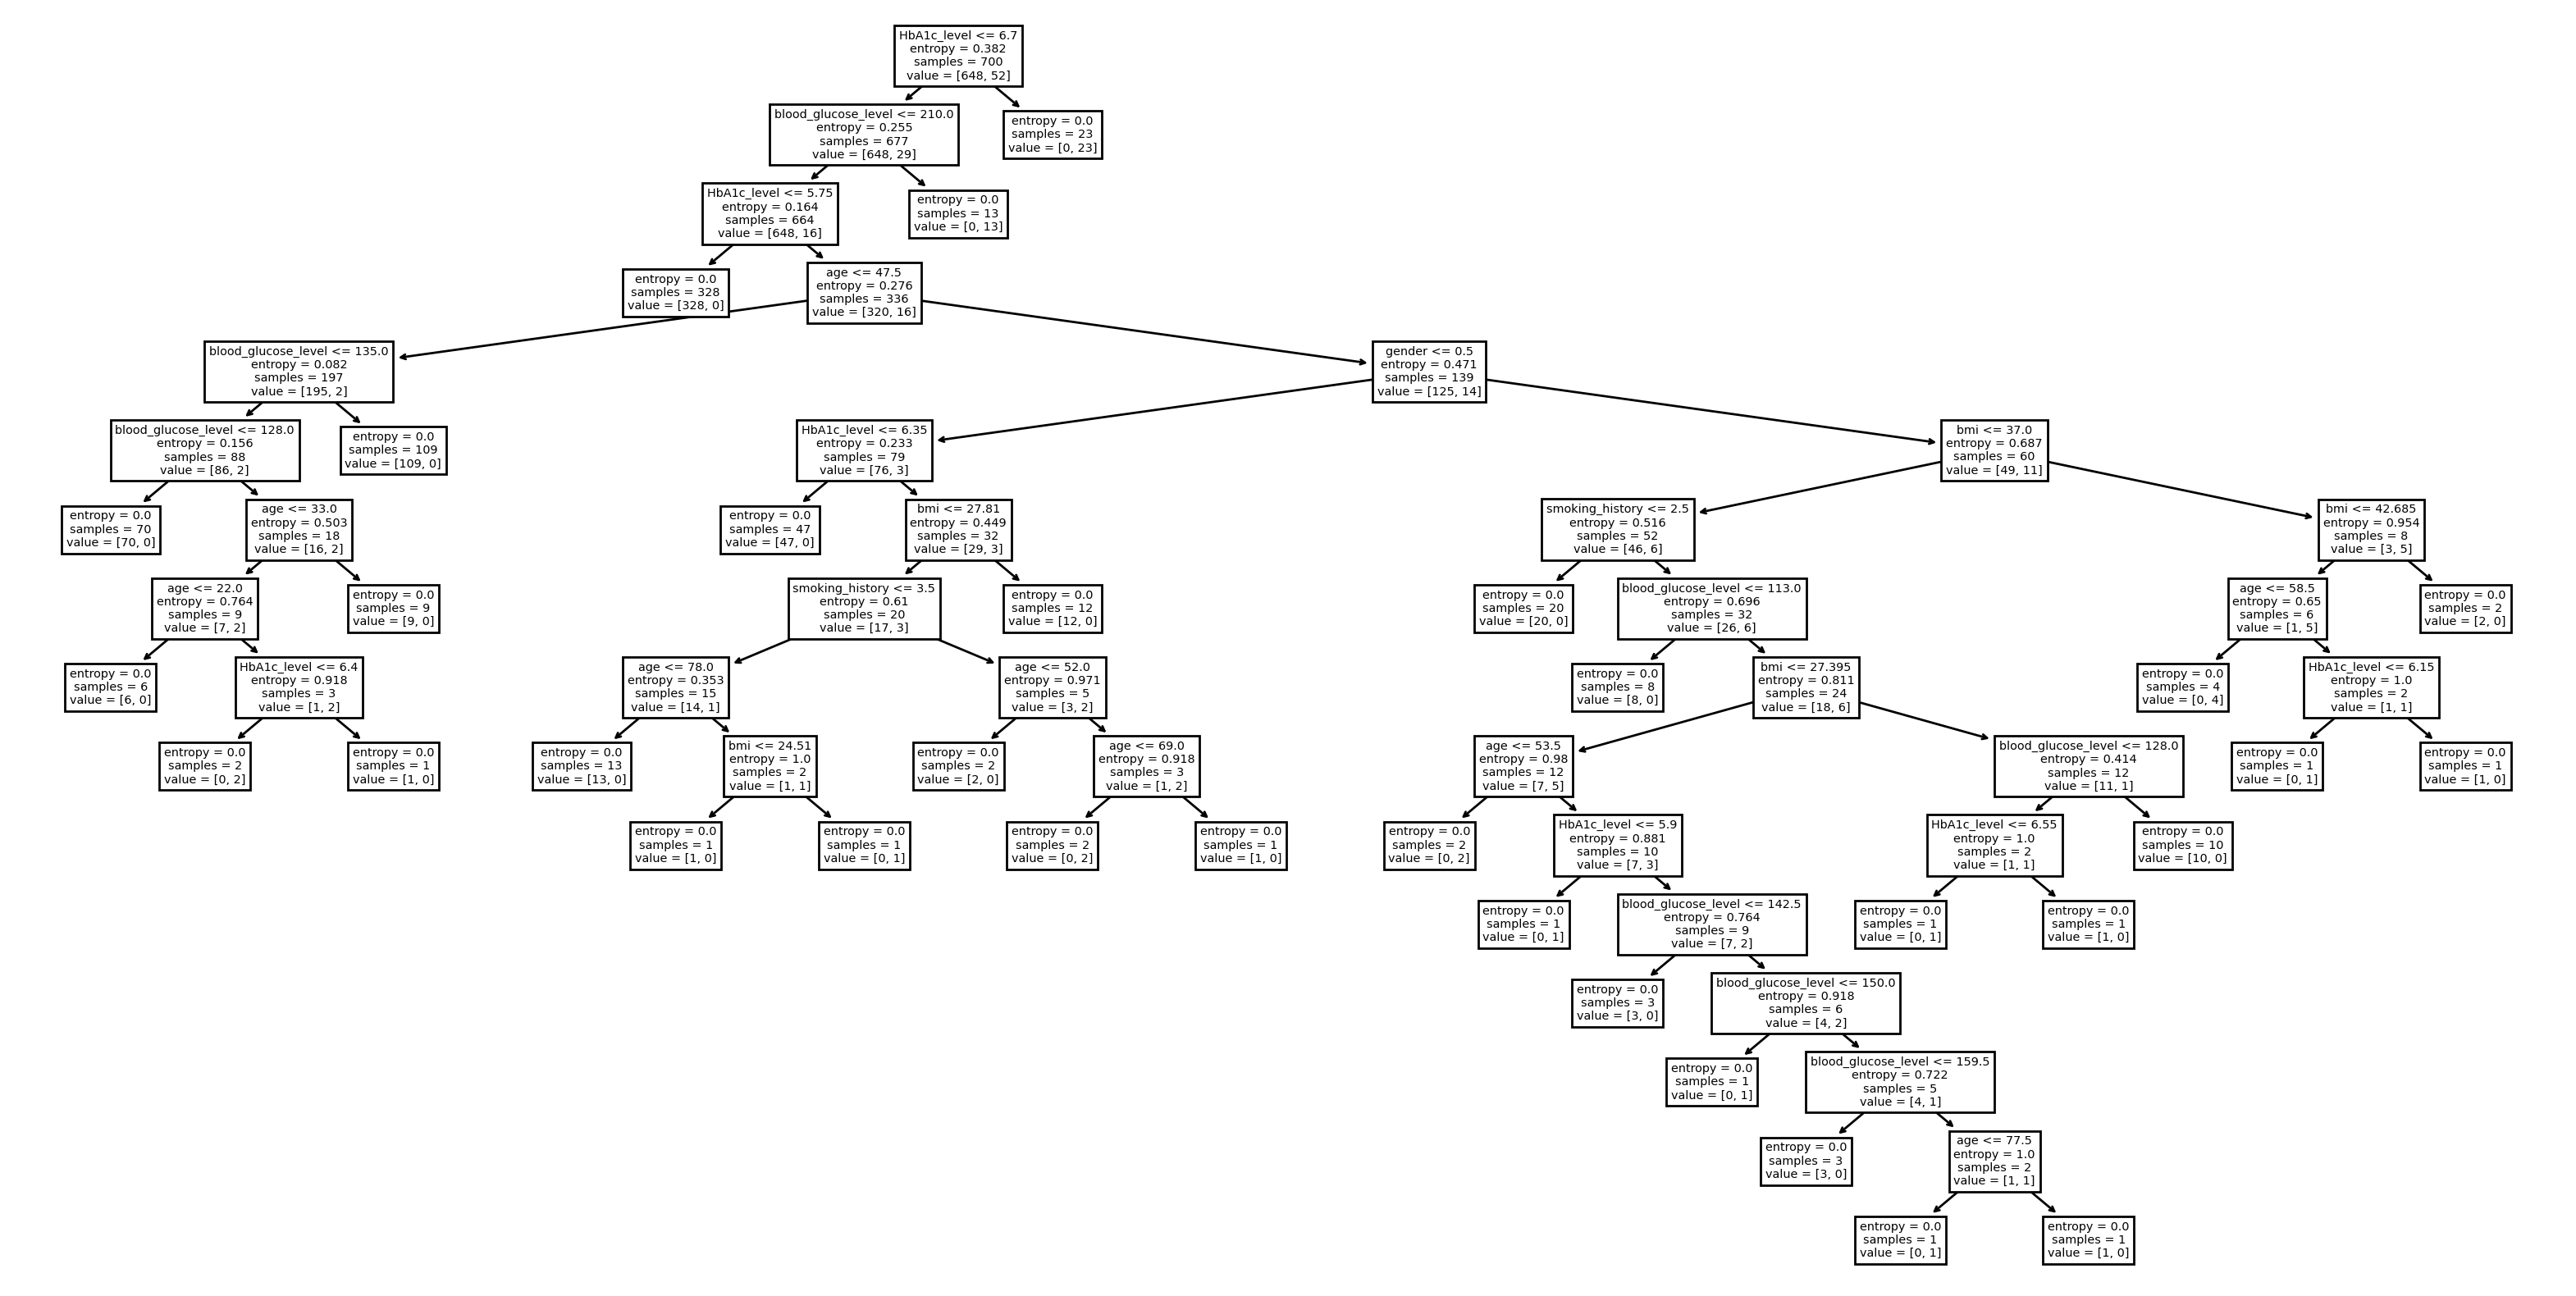

In [43]:
plt.figure(figsize=(20, 10), dpi=200)
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',	'HbA1c_level', 'blood_glucose_level', 'diabetes']
tree.plot_tree(dtc_1, feature_names=features)
plt.show()